In [1]:
####################################################################
# download image data from MNIST and plot the image of the first 25
####################################################################

In [2]:
# download image data from MNIST

import gzip
import struct
import numpy as np
import matplotlib.pyplot as plt
import requests
import os
import math

urls = ['http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz',
        'http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz',
        'http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz',
        'http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz']

class Downloader():
    def __init__(self):
        self.saved_data = []
        
    def download(self, url:str)-> None:
        response = requests.get(url)
        if response.status_code == 200:
            save_filename = os.path.basename(url)
            with open(save_filename, 'wb') as f:
                f.write(response.content)
                print(f"downloaded: {url}")
                self.saved_data.append(save_filename)
        else:
            print('Request failed with status code:', response.status_code)

    def download_all(self, urls:list[str]):
        for url in urls:
            self.download(url)

# download data
downloader = Downloader()
url = 'http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz'
filename = os.path.basename(url)
if not os.path.exists(filename):
    downloader.download(url)

Magic number: 2051
Number of images: 60000
Image size: 28 x 28


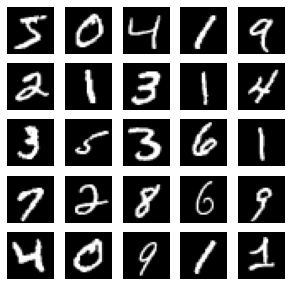

In [5]:
# Plot the image of the first 25

url = 'http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz'
filename = os.path.basename(url) # train-images-idx3-ubyte.gz
n_images_plot = 25 # number of images we plot

with gzip.open(filename, 'rb') as f:
    # Read the first 16 bytes of metadata
    magic, n_images_total, n_rows, n_cols = struct.unpack('>IIII', f.read(16))
    print('Magic number:', magic) # magic number assigned to each MNIST data
    print('Number of images:', n_images_total) # 60000
    print('Image size:', n_rows, 'x', n_cols) # 28x28

    # Read the image data 
    image_size = n_rows * n_cols
    images_data = f.read(image_size * n_images_plot)
    images = np.frombuffer(images_data, dtype=np.uint8) # 1d np.array, shape=(n_images_plot*28*28,)
    images = images.reshape(n_images_plot, n_rows, n_cols) # 3d np.array, shape=(n_images_plot,28,28)

    # we are going to create n x n table
    n = math.ceil(math.sqrt(n_images_plot))

    # Plot the images
    fig, axes = plt.subplots(nrows=n, ncols=n, figsize=(n, n))
    for i, ax in enumerate(axes.flat):
        if i < n_images_plot:
            ax.imshow(images[i], cmap='gray')
        ax.axis('off')
    plt.show()